In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

In [5]:
fashion_mnistData = load_data()
(x_train,y_train), (x_test,y_test) = fashion_mnistData

In [6]:
print(x_train.shape)

(60000, 28, 28)


In [7]:
print(y_train.shape)
print(y_train)

(60000,)
[5 0 4 ... 5 6 8]


In [8]:
y_trainOne = to_categorical(y_train)

In [9]:
model = Sequential()
              #필터 갯수  #필터 사이즈  #몇칸씩 이동
model.add( Conv2D(32, kernel_size=(3, 3), strides=1, input_shape=(28, 28, 1),
                 activation = 'relu', padding='same') ) #padding : 데이터에 특정 값을 채워서 데이터의 크기를 조정
model.add( Conv2D(64, kernel_size=(3, 3), activation='relu') )
model.add( MaxPool2D(pool_size=(2, 2) ) )
model.add( Flatten() )
model.add( Dense( units=64, activation='relu'))
model.add( Dense( units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])
model.fit(x_train.reshape(60000, 28, 28, 1), y_trainOne, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2472 - acc: 0.9537
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0521 - acc: 0.9841
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0371 - acc: 0.9887
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0314 - acc: 0.9900
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0256 - acc: 0.9923 0s - loss: 0.0255 - acc: 
Epoch 6/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0205 - acc: 0.9940
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0198 - acc: 0.9941
Epoch 8/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0166 - acc: 0.9953
Epoch 9/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0127 - acc: 0.9964
Epoch 10/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.01

In [10]:
model.predict(x_test[0].reshape(1,28,28) ).argmax(axis=1)

array([7], dtype=int64)

In [11]:
y_test[0]

7

In [14]:
from sklearn.metrics import confusion_matrix 
conf_mat_k = confusion_matrix( y_test, model.predict( x_test.reshape(-1,28,28) ).argmax(axis=1))
conf_mat_k

array([[ 966,    1,    1,    0,    0,    0,    8,    0,    3,    1],
       [   0, 1122,    0,    5,    1,    2,    4,    0,    1,    0],
       [   2,    0, 1012,    3,    1,    0,    1,   11,    2,    0],
       [   0,    0,    1, 1001,    0,    4,    0,    2,    2,    0],
       [   0,    0,    1,    0,  971,    0,    1,    0,    0,    9],
       [   0,    0,    0,    6,    0,  883,    1,    0,    2,    0],
       [   2,    2,    0,    0,    1,    6,  942,    0,    5,    0],
       [   0,    4,    9,    0,    2,    0,    0, 1009,    3,    1],
       [   0,    0,    2,    1,    3,    2,    1,    2,  960,    3],
       [   1,    2,    0,    3,    9,    3,    0,    6,    3,  982]],
      dtype=int64)

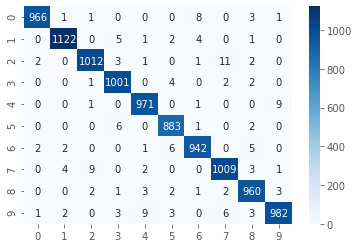

In [16]:
import seaborn as sns
sns.heatmap( conf_mat_k, annot=True, fmt='d', cmap='Blues')
plt.show()